<a href="https://colab.research.google.com/github/DavyL0/Data-Analize-Bank/blob/main/Mod9Tarefa2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
!pip install pandas==1.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.19.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
bigframes 1.17.0 requires pandas>=1.5.3, but you have pandas 1.3.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.3.5 which is incompatible.
geopandas 1.0.1 requires pandas>=1.4.0, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.3.5 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.3.5 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
munResLat = sinasc_raw['munResLat']
munResLat.groupby(pd.cut(munResLat, [-10.5, -10, 10])).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResLat,,,,,,,
"(-10.5, -10.0]",-24301.08983,-10.349698,-10.43595,-10.20981,-10.41177,0.098244,0.009652
"(-10.0, 10.0]",-105310.05048,-9.011642,-9.90846,-8.76889,-8.76889,0.436251,0.190315


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
munResArea = sinasc_raw['munResArea']
munResArea.groupby(pd.cut(munResArea, [0, 3000, 10000])).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResArea,,,,,,,
"(0, 3000]",9.665178e+06,1851.921453,459.978,2944.128,1758.465,709.884005,5.039353e+05
"(3000, 10000]",5.463696e+07,5322.645942,3029.189,8509.270,4518.035,1591.161889,2.531796e+06


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
munResAlt = sinasc_raw['munResAlt']
munResAlt.groupby(pd.cut(munResAlt, [0, 100, 200])).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResAlt,,,,,,,
"(0, 100]",773455.0,87.071372,85.0,99.0,87.0,1.383417,1.913843
"(100, 200]",1887871.0,158.060198,111.0,197.0,157.0,18.814620,353.989929


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [5]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [6]:
sinasc2 = sinasc_raw.set_index('munResNome')
sinasc2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


MultiIndex([(      'Posição',         'Posição', 'IDH-M muito alto'),
            (    'Município',       'Município', 'IDH-M muito alto'),
            ('Dados de 2010',   'IDH municipal', 'IDH-M muito alto'),
            ('Dados de 2010',       'IDH renda', 'IDH-M muito alto'),
            ('Dados de 2010', 'IDH longevidade', 'IDH-M muito alto'),
            ('Dados de 2010',    'IDH educação', 'IDH-M muito alto')],
           )


Text(0, 0.5, 'IDH')

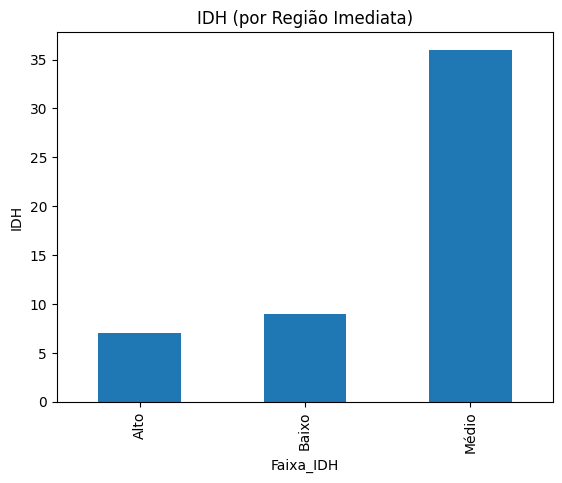

In [12]:
# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
idh_table = tables[0]

# Verificar as colunas da tabela
print(idh_table.columns)

# Ajustar os nomes das colunas conforme necessário
idh_table.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']

# Manter apenas as colunas necessárias
idh_table = idh_table[['Posição', 'Município', 'IDH']].copy() # Usar .copy() para evitar o alerta

# Remover possíveis linhas com valores faltantes ou não numéricos
idh_table.loc[:, 'IDH'] = pd.to_numeric(idh_table['IDH'], errors='coerce')

# Dropar linhas onde IDH seja NaN
idh_table.dropna(subset=['IDH'], inplace=True)

# Função para mapear o IDH para as faixas
def categorize_idh(idh):
   if idh < 0.500:
       return "Muito Baixo"
   elif idh < 0.600:
       return "Baixo"
   elif idh < 0.700:
       return "Médio"
   elif idh < 0.800:
       return "Alto"
   else:
       return "Muito Alto"

# Aplicar a função à coluna 'IDH'
idh_table.loc[:, 'Faixa_IDH'] = idh_table['IDH'].apply(categorize_idh)

# Agrupar os dados por faixa de IDH
agrupamento_faixas = idh_table.groupby('Faixa_IDH').count()['Município'].plot(kind='bar')

# Exibir o DataFrame com os municípios e suas classificações de IDH
idh_table_classificado = idh_table[['Município', 'IDH', 'Faixa_IDH']]

plt.title("IDH (por Região Imediata)")
plt.xlabel('Faixa_IDH')
plt.ylabel('IDH')

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


MultiIndex([(                'Posição', 'Desenvolvimento alto'),
            (              'Município', 'Desenvolvimento alto'),
            ('IFDM Consolidado (2013)', 'Desenvolvimento alto')],
           )
                    Município    IFDM   Faixa_IFDM
2                   Ariquemes  0.7746         Alto
3                     Vilhena  0.7465         Alto
4               Pimenta Bueno  0.7383         Alto
5                 Porto Velho  0.7257         Alto
6                   Ji-Paraná  0.7117         Alto
7                      Cacoal  0.7111         Alto
8         Santa Luzia d'Oeste  0.6850        Médio
9              Rolim de Moura  0.6785        Médio
10                Chupinguaia  0.6766        Médio
11      São Miguel do Guaporé  0.6699        Médio
12       Pimenteiras do Oeste  0.6501        Médio
13              Teixeirópolis  0.6500        Médio
14          Colorado do Oeste  0.6473        Médio
15                       Jaru  0.6450        Médio
16                 Rio Cre

Text(0, 0.5, 'IFDM')

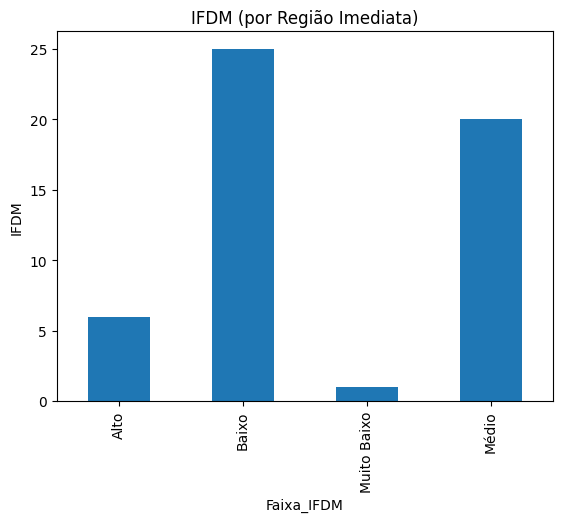

In [19]:
import pandas as pd

# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
ifdm_table = tables[0]

# Verificar as colunas da tabela
print(ifdm_table.columns)

# Ajustar os nomes das colunas conforme necessário
ifdm_table.columns = ['Posição', 'Município', 'IFDM']

# Manter apenas as colunas necessárias
ifdm_table = ifdm_table[['Posição', 'Município', 'IFDM']].copy()  # Usar .copy() para evitar o alerta

# Remover possíveis linhas com valores faltantes ou não numéricos
ifdm_table['IFDM'] = pd.to_numeric(ifdm_table['IFDM'], errors='coerce')

# Dropar linhas onde IFDM seja NaN
ifdm_table.dropna(subset=['IFDM'], inplace=True)

# Função para mapear o IFDM para as faixas
def categorize_ifdm(ifdm):
   if ifdm < 0.500:
       return "Muito Baixo"
   elif ifdm < 0.600:
       return "Baixo"
   elif ifdm < 0.700:
       return "Médio"
   elif ifdm < 0.800:
       return "Alto"
   else:
       return "Muito Alto"

# Aplicar a função à coluna 'IFDM'
ifdm_table['Faixa_IFDM'] = ifdm_table['IFDM'].apply(categorize_ifdm)

# Agrupar os dados por faixa de IFDM
agrupamento_faixas = ifdm_table.groupby('Faixa_IFDM').count()['Município'].plot(kind='bar')

# Exibir o DataFrame com os municípios e suas classificações de IFDM
ifdm_table_classificado = ifdm_table[['Município', 'IFDM', 'Faixa_IFDM']]

# Mostrar a tabela classificada
print(ifdm_table_classificado)

plt.title("IFDM (por Região Imediata)")
plt.xlabel('Faixa_IFDM')
plt.ylabel('IFDM')

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

MultiIndex([(  'Posição',        'Em 2019'),
            (  'Posição', 'Mudança (2014)'),
            ('Município',      'Município'),
            (      'PIB',            'PIB'),
            ('Alteração',      'Alteração')],
           )


IndexError: index 0 is out of bounds for axis 0 with size 0

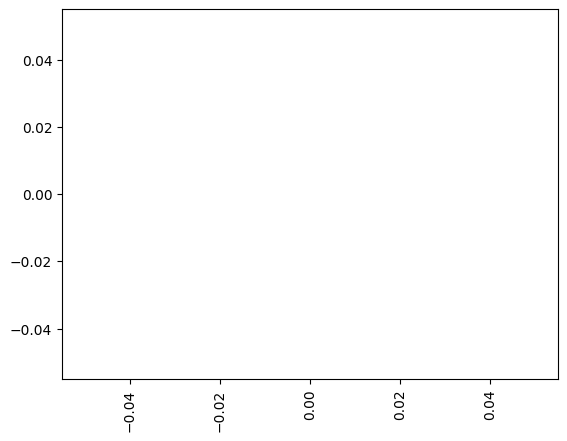

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
pib_table = tables[0]

# Exibir as colunas da tabela para visualização
print(pib_table.columns)

# Ajustar os nomes das colunas conforme necessário
pib_table.columns = ['Posição', 'Mudança', 'Município', 'PIB', 'Alteração']

# Manter apenas as colunas necessárias
pib_table = pib_table[['Posição', 'Município', 'PIB']].copy()

# Remover possíveis linhas com valores faltantes ou não numéricos
pib_table['PIB'] = pd.to_numeric(pib_table['PIB'], errors='coerce')

# Dropar linhas onde o PIB seja NaN
pib_table.dropna(subset=['PIB'], inplace=True)

# Função de categorização para o PIB
def categorize_pib(pib):
    if pib ==  "Até 100 Milhões":
        return "Muito Baixo"
    elif pib == "Acima de 200 Milhões":
        return "Baixo"
    elif pib == "Acima de 300 Milhões":
        return "Médio"
    elif pib == "Acima de 500 Milhões":
        return "Alto"
    else:
        return "Muito Alto"

# Aplicar a função à coluna 'PIB'
pib_table['Faixa_IFDM'] = pib_table['PIB'].apply(categorize_ifdm)

# Agrupar os dados por faixa de PIB
agrupamento_faixas = pib_table.groupby('PIB').count()['Município'].plot(kind='bar')

# Exibir o DataFrame com os municípios e suas classificações de PIB
pib_table_classificado = pib_table[['Posição', 'Município', 'PIB']]

# Mostrar a tabela classificada
print(pib_table_classificado)

plt.title("PIB (por Região Imediata)")
plt.xlabel('Faixa_PIB')
plt.ylabel('PIB')


MultiIndex([(  'Posição',        'Em 2019'),
            (  'Posição', 'Mudança (2014)'),
            ('Município',      'Município'),
            (      'PIB',            'PIB'),
            ('Alteração',      'Alteração')],
           )


IndexError: index 0 is out of bounds for axis 0 with size 0

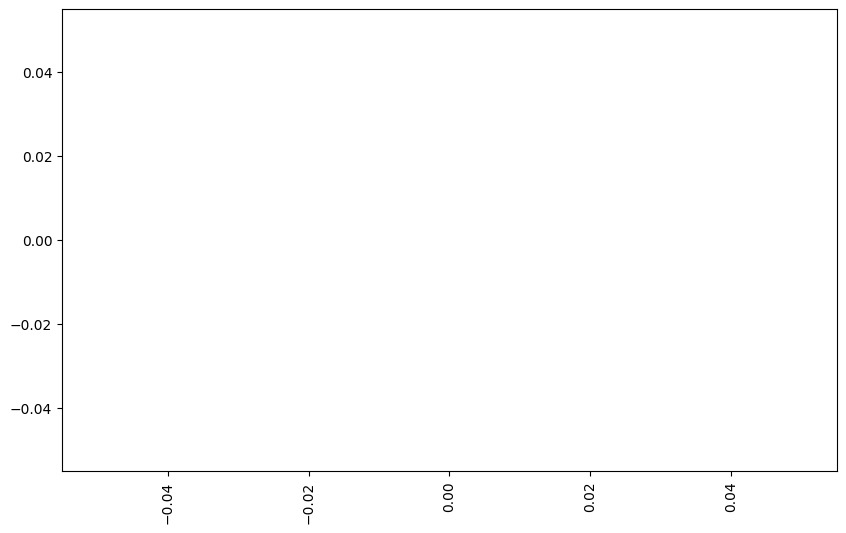

In [43]:

# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
pib_table = tables[0]

# Exibir as colunas da tabela para visualização
print(pib_table.columns)

# Ajustar os nomes das colunas conforme necessário
pib_table.columns = ['Posição', 'Mudança', 'Município', 'PIB', 'Alteração']

# Manter apenas as colunas necessárias
pib_table = pib_table[['Posição', 'Município', 'PIB']].copy()

# Remover possíveis linhas com valores faltantes ou não numéricos
pib_table['PIB'] = pd.to_numeric(pib_table['PIB'], errors='coerce')

# Dropar linhas onde o PIB seja NaN
pib_table.dropna(subset=['PIB'], inplace=True)

# Função de categorização para o PIB
def categorize_pib(pib):
    if pib < 100_000_000:
        return "Até 100 Milhões"
    elif pib < 200_000_000:
        return "Acima de 100 Milhões"
    elif pib < 300_000_000:
        return "Acima de 200 Milhões"
    elif pib < 500_000_000:
        return "Acima de 300 Milhões"
    else:
        return "Acima de 500 Milhões"

# Aplicar a função de categorização à coluna PIB
pib_table['Faixa_PIB'] = pib_table['PIB'].apply(categorize_pib)

# Agrupar os dados por faixa de PIB e contar o número de municípios em cada faixa
agrupamento_faixas = pib_table.groupby('Faixa_PIB').count()['Município']

# Criar um gráfico de barras para o número de municípios em cada faixa de PIB
agrupamento_faixas.plot(kind='bar', figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title("Número de Municípios por Faixa de PIB em Rondônia")
plt.xlabel("Faixa de PIB")
plt.ylabel("Número de Municípios")

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Exibir o DataFrame com os municípios e suas classificações de PIB
pib_table_classificado = pib_table[['Posição', 'Município', 'PIB', 'Faixa_PIB']]

# Mostrar a tabela classificada
print(pib_table_classificado)


MultiIndex([(  'Posição',        'Em 2019'),
            (  'Posição', 'Mudança (2014)'),
            ('Município',      'Município'),
            (      'PIB',            'PIB'),
            ('Alteração',      'Alteração')],
           )


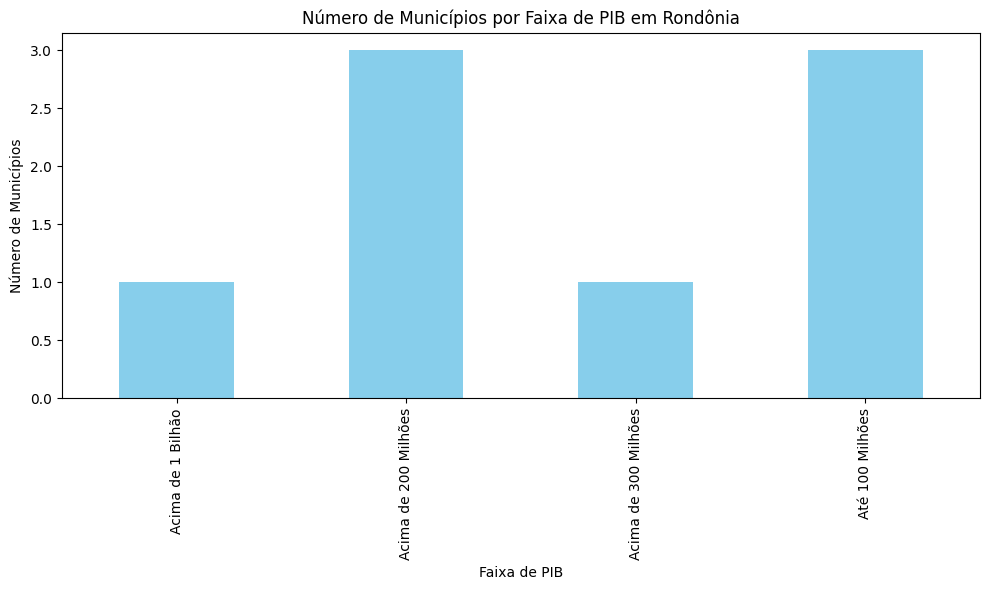

   Posição       Município         PIB             Faixa_PIB
0        1     Porto Velho  17912070.0     Acima de 1 Bilhão
1        2       Ji-Paraná   3783972.0  Acima de 300 Milhões
2        3         Vilhena   2831175.0  Acima de 200 Milhões
3        4       Ariquemes   2579830.0  Acima de 200 Milhões
4        5          Cacoal   2261644.0  Acima de 200 Milhões
5        6            Jaru   1500890.0       Até 100 Milhões
6        7  Rolim de Moura   1283434.0       Até 100 Milhões
7        8   Pimenta Bueno   1164877.0       Até 100 Milhões


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# URL da página da Wikipedia
url = "https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB"

# Ler todas as tabelas da página
tables = pd.read_html(url)

# Selecionar a tabela correta (neste caso, a primeira)
pib_table = tables[0]

# Exibir as colunas da tabela para visualização
print(pib_table.columns)

# Ajustar os nomes das colunas conforme necessário
pib_table.columns = ['Posição', 'Mudança', 'Município', 'PIB', 'Alteração']

# Manter apenas as colunas necessárias
pib_table = pib_table[['Posição', 'Município', 'PIB']].copy()

# Remover caracteres não numéricos e converter para float
pib_table['PIB'] = pib_table['PIB'].str.replace(r'[^0-9,]', '', regex=True).str.replace(',', '.').astype(float)

# Função de categorização para o PIB
def categorize_pib(pib):
    if pib >= 10000000:
        return "Acima de 1 Bilhão"
    elif pib >= 5000000:
        return "Acima de 500 Milhões"
    elif pib >= 3000000:
        return "Acima de 300 Milhões"
    elif pib >= 2000000:
        return "Acima de 200 Milhões"
    else:
        return "Até 100 Milhões"

# Aplicar a função de categorização à coluna PIB
pib_table['Faixa_PIB'] = pib_table['PIB'].apply(categorize_pib)

# Agrupar os dados por faixa de PIB e contar o número de municípios em cada faixa
agrupamento_faixas = pib_table.groupby('Faixa_PIB').count()['Município']

# Criar um gráfico de barras para o número de municípios em cada faixa de PIB
agrupamento_faixas.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title("Número de Municípios por Faixa de PIB em Rondônia")
plt.xlabel("Faixa de PIB")
plt.ylabel("Número de Municípios")

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Exibir o DataFrame com os municípios e suas classificações de PIB
pib_table_classificado = pib_table[['Posição', 'Município', 'PIB', 'Faixa_PIB']]

# Mostrar a tabela classificada
print(pib_table_classificado)


Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.